In [29]:
!pip install missingno

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline    


pd.options.display.max_rows   #check the program without this %matplotlib inline

60

In [3]:
df=pd.read_csv("dataset.csv")

In [5]:
df.shape   #cannot drop 284 rows out of 3175 rows
#cannot delete column either

(3175, 11)

In [7]:
df.head()


,country,state,city,station,last_update,latitude,longitude,pollutant_id,pollutant_min,pollutant_max,pollutant_avg
0,India,Andhra_Pradesh,Anantapur,"Gulzarpet, Anantapur - APPCB",15-04-2025 18:00:00,14.675886,77.593027,OZONE,27.0,52.0,44.0
1,India,Andhra_Pradesh,Chittoor,"Gangineni Cheruvu, Chittoor - APPCB",15-04-2025 18:00:00,13.204880,79.097889,PM10,7.0,129.0,44.0
2,India,Andhra_Pradesh,Chittoor,"Gangineni Cheruvu, Chittoor - APPCB",15-04-2025 18:00:00,13.204880,79.097889,NO2,18.0,24.0,19.0
3,India,Andhra_Pradesh,Kadapa,"Yerramukkapalli, Kadapa - APPCB",15-04-2025 18:00:00,14.465052,78.824187,PM2.5,53.0,76.0,63.0
4,India,Andhra_Pradesh,Kadapa,"Yerramukkapalli, Kadapa - APPCB",15-04-2025 18:00:00,14.465052,78.824187,NO2,12.0,24.0,16.0


Finding how many missing values are there-

In [10]:
print(df.isnull().sum())


country            0
state              0
city               0
station            0
last_update        0
latitude           0
longitude          0
pollutant_id       0
pollutant_min    284
pollutant_max    284
pollutant_avg    284
dtype: int64


In [12]:
df.isnull().sum().sum()            #total number of missing data

852

Missingness is not random as equal number of max min and avg is missing.so missingness as feature can be used.
“When columns have the exact same number of missing values, it might look like a relationship, but it might not be one.”

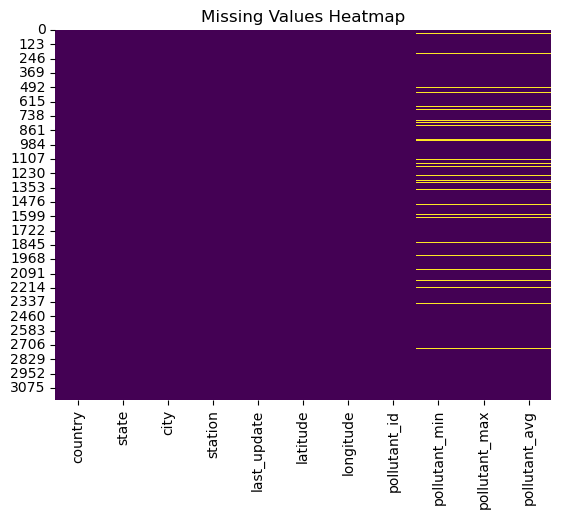

In [15]:
# plt.figure(figsize=(12,8))
sns.heatmap(df.isnull(),cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

The missing pollutant_min, max and avg are from same column,confirmed that missingness as a feature can be used./only one couln is used for  binary flag as the missing values belong to the same rows



In [18]:
df['pollutant_missing']=df['pollutant_avg'].isna().astype(int)
df

,country,state,city,station,last_update,latitude,longitude,pollutant_id,pollutant_min,pollutant_max,pollutant_avg,pollutant_missing
0,India,Andhra_Pradesh,Anantapur,"Gulzarpet, Anantapur - APPCB",15-04-2025 18:00:00,14.675886,77.593027,OZONE,27.0,52.0,44.0,0
1,India,Andhra_Pradesh,Chittoor,"Gangineni Cheruvu, Chittoor - APPCB",15-04-2025 18:00:00,13.204880,79.097889,PM10,7.0,129.0,44.0,0
2,India,Andhra_Pradesh,Chittoor,"Gangineni Cheruvu, Chittoor - APPCB",15-04-2025 18:00:00,13.204880,79.097889,NO2,18.0,24.0,19.0,0
3,India,Andhra_Pradesh,Kadapa,"Yerramukkapalli, Kadapa - APPCB",15-04-2025 18:00:00,14.465052,78.824187,PM2.5,53.0,76.0,63.0,0
4,India,Andhra_Pradesh,Kadapa,"Yerramukkapalli, Kadapa - APPCB",15-04-2025 18:00:00,14.465052,78.824187,NO2,12.0,24.0,16.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3170,India,West_Bengal,Kolkata,"Rabindra Bharati University, Kolkata - WBPCB",15-04-2025 18:00:00,22.627847,88.380669,NO2,16.0,33.0,22.0,0
3171,India,West_Bengal,Kolkata,"Rabindra Sarobar, Kolkata - WBPCB",15-04-2025 18:00:00,22.511060,88.351420,NO2,35.0,105.0,55.0,0
3172,India,West_Bengal,Kolkata,"Victoria, Kolkata - WBPCB",15-04-2025 18:00:00,22.544808,88.340369,PM10,60.0,112.0,79.0,0
3173,India,West_Bengal,Kolkata,"Victoria, Kolkata - WBPCB",15-04-2025 18:00:00,22.544808,88.340369,NO2,24.0,33.0,27.0,0


In [20]:
column_df = df['pollutant_id']
column_df

0       OZONE
1        PM10
2         NO2
3       PM2.5
4         NO2
        ...  
3170      NO2
3171      NO2
3172     PM10
3173      NO2
3174      NO2
Name: pollutant_id, Length: 3175, dtype: object

Imputation

The average concentration of a pollutant is not directly calculated by simply averaging the maximum and minimum pollutant levels. Instead, it's determined by averaging the pollutant concentrations measured over a specific period, such as an hour, 8 hours, or a full day


Encoding categorical column(pollutant id) to do multivariate imputation for better results. using one hot encoding


In [25]:
one_hot=pd.get_dummies(df['pollutant_id'])
df_n=pd.concat([one_hot, df], axis=1)
df_n=df_n.drop('pollutant_id',axis=1)

In [27]:
df_n.head()

,CO,NH3,NO2,OZONE,PM10,PM2.5,SO2,country,state,city,station,last_update,latitude,longitude,pollutant_min,pollutant_max,pollutant_avg,pollutant_missing
0,False,False,False,True,False,False,False,India,Andhra_Pradesh,Anantapur,"Gulzarpet, Anantapur - APPCB",15-04-2025 18:00:00,14.675886,77.593027,27.0,52.0,44.0,0
1,False,False,False,False,True,False,False,India,Andhra_Pradesh,Chittoor,"Gangineni Cheruvu, Chittoor - APPCB",15-04-2025 18:00:00,13.204880,79.097889,7.0,129.0,44.0,0
2,False,False,True,False,False,False,False,India,Andhra_Pradesh,Chittoor,"Gangineni Cheruvu, Chittoor - APPCB",15-04-2025 18:00:00,13.204880,79.097889,18.0,24.0,19.0,0
3,False,False,False,False,False,True,False,India,Andhra_Pradesh,Kadapa,"Yerramukkapalli, Kadapa - APPCB",15-04-2025 18:00:00,14.465052,78.824187,53.0,76.0,63.0,0
4,False,False,True,False,False,False,False,India,Andhra_Pradesh,Kadapa,"Yerramukkapalli, Kadapa - APPCB",15-04-2025 18:00:00,14.465052,78.824187,12.0,24.0,16.0,0


applying iterative imputation on these columns


In [30]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [31]:
print(df_n.columns.tolist())


['CO', 'NH3', 'NO2', 'OZONE', 'PM10', 'PM2.5', 'SO2', 'country', 'state', 'city', 'station', 'last_update', 'latitude', 'longitude', 'pollutant_min', 'pollutant_max', 'pollutant_avg', 'pollutant_missing']


In [34]:
df_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3175 entries, 0 to 3174
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CO                 3175 non-null   bool   
 1   NH3                3175 non-null   bool   
 2   NO2                3175 non-null   bool   
 3   OZONE              3175 non-null   bool   
 4   PM10               3175 non-null   bool   
 5   PM2.5              3175 non-null   bool   
 6   SO2                3175 non-null   bool   
 7   country            3175 non-null   object 
 8   state              3175 non-null   object 
 9   city               3175 non-null   object 
 10  station            3175 non-null   object 
 11  last_update        3175 non-null   object 
 12  latitude           3175 non-null   float64
 13  longitude          3175 non-null   float64
 14  pollutant_min      2891 non-null   float64
 15  pollutant_max      2891 non-null   float64
 16  pollutant_avg      2891 

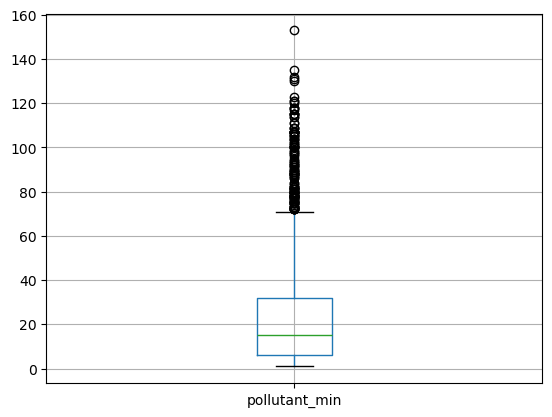

In [36]:
df_n.boxplot(column=["pollutant_min"])
plt.show()

In [38]:
dropped_columns = df_n[['country','state','city','station','last_update','latitude', 'longitude','pollutant_missing']].copy()

In [40]:
# df_new=df_n.drop(columns=['country','state','city','station','last_update','latitude','longitude','pollutant_missing'],axis=0) error line
df_n=df_n.drop(columns=['country','state','city','station','last_update','latitude','longitude','pollutant_missing'],axis=1)
# dropped_columns = df_n[['country','state','city','station','last_update','latitude', 'longitude','pollutant_missing']].copy()
df_n.head

<bound method NDFrame.head of          CO    NH3    NO2  OZONE   PM10  PM2.5    SO2  pollutant_min  \
0     False  False  False   True  False  False  False           27.0   
1     False  False  False  False   True  False  False            7.0   
2     False  False   True  False  False  False  False           18.0   
3     False  False  False  False  False   True  False           53.0   
4     False  False   True  False  False  False  False           12.0   
...     ...    ...    ...    ...    ...    ...    ...            ...   
3170  False  False   True  False  False  False  False           16.0   
3171  False  False   True  False  False  False  False           35.0   
3172  False  False  False  False   True  False  False           60.0   
3173  False  False   True  False  False  False  False           24.0   
3174  False  False   True  False  False  False  False            NaN   

      pollutant_max  pollutant_avg  
0              52.0           44.0  
1             129.0           4

doing 

In [43]:
imputer=IterativeImputer(max_iter=40,random_state=42)      #set max_iter to high for removing warning
imputed=imputer.fit_transform(df_n)
df_imputed=pd.DataFrame(imputed,columns=df_n.columns)
df_imputed

,CO,NH3,NO2,OZONE,PM10,PM2.5,SO2,pollutant_min,pollutant_max,pollutant_avg
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,27.000000,52.000000,44.000000
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7.000000,129.000000,44.000000
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,18.000000,24.000000,19.000000
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,53.000000,76.000000,63.000000
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,12.000000,24.000000,16.000000
...,...,...,...,...,...,...,...,...,...,...
3170,0.0,0.0,1.0,0.0,0.0,0.0,0.0,16.000000,33.000000,22.000000
3171,0.0,0.0,1.0,0.0,0.0,0.0,0.0,35.000000,105.000000,55.000000
3172,0.0,0.0,0.0,0.0,1.0,0.0,0.0,60.000000,112.000000,79.000000
3173,0.0,0.0,1.0,0.0,0.0,0.0,0.0,24.000000,33.000000,27.000000


In [44]:
print(df_imputed.isnull().sum())

CO               0
NH3              0
NO2              0
OZONE            0
PM10             0
PM2.5            0
SO2              0
pollutant_min    0
pollutant_max    0
pollutant_avg    0
dtype: int64


In [47]:
df_imputed=pd.concat([df_imputed, dropped_columns],axis=1)
df_imputed.head()

,CO,NH3,NO2,OZONE,PM10,PM2.5,SO2,pollutant_min,pollutant_max,pollutant_avg,country,state,city,station,last_update,latitude,longitude,pollutant_missing
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,27.0,52.0,44.0,India,Andhra_Pradesh,Anantapur,"Gulzarpet, Anantapur - APPCB",15-04-2025 18:00:00,14.675886,77.593027,0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7.0,129.0,44.0,India,Andhra_Pradesh,Chittoor,"Gangineni Cheruvu, Chittoor - APPCB",15-04-2025 18:00:00,13.204880,79.097889,0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,18.0,24.0,19.0,India,Andhra_Pradesh,Chittoor,"Gangineni Cheruvu, Chittoor - APPCB",15-04-2025 18:00:00,13.204880,79.097889,0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,53.0,76.0,63.0,India,Andhra_Pradesh,Kadapa,"Yerramukkapalli, Kadapa - APPCB",15-04-2025 18:00:00,14.465052,78.824187,0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,12.0,24.0,16.0,India,Andhra_Pradesh,Kadapa,"Yerramukkapalli, Kadapa - APPCB",15-04-2025 18:00:00,14.465052,78.824187,0


In [49]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3175 entries, 0 to 3174
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CO                 3175 non-null   float64
 1   NH3                3175 non-null   float64
 2   NO2                3175 non-null   float64
 3   OZONE              3175 non-null   float64
 4   PM10               3175 non-null   float64
 5   PM2.5              3175 non-null   float64
 6   SO2                3175 non-null   float64
 7   pollutant_min      3175 non-null   float64
 8   pollutant_max      3175 non-null   float64
 9   pollutant_avg      3175 non-null   float64
 10  country            3175 non-null   object 
 11  state              3175 non-null   object 
 12  city               3175 non-null   object 
 13  station            3175 non-null   object 
 14  last_update        3175 non-null   object 
 15  latitude           3175 non-null   float64
 16  longitude          3175 

In [51]:
# dataset = df_imputed.T.drop_duplicates().T

In [53]:
df_imputed.columns

Index(['CO', 'NH3', 'NO2', 'OZONE', 'PM10', 'PM2.5', 'SO2', 'pollutant_min',
       'pollutant_max', 'pollutant_avg', 'country', 'state', 'city', 'station',
       'last_update', 'latitude', 'longitude', 'pollutant_missing'],
      dtype='object')

In [56]:
print(df_imputed.isnull().sum())

CO                   0
NH3                  0
NO2                  0
OZONE                0
PM10                 0
PM2.5                0
SO2                  0
pollutant_min        0
pollutant_max        0
pollutant_avg        0
country              0
state                0
city                 0
station              0
last_update          0
latitude             0
longitude            0
pollutant_missing    0
dtype: int64


In [58]:
df_imputed.head()

,CO,NH3,NO2,OZONE,PM10,PM2.5,SO2,pollutant_min,pollutant_max,pollutant_avg,country,state,city,station,last_update,latitude,longitude,pollutant_missing
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,27.0,52.0,44.0,India,Andhra_Pradesh,Anantapur,"Gulzarpet, Anantapur - APPCB",15-04-2025 18:00:00,14.675886,77.593027,0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7.0,129.0,44.0,India,Andhra_Pradesh,Chittoor,"Gangineni Cheruvu, Chittoor - APPCB",15-04-2025 18:00:00,13.204880,79.097889,0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,18.0,24.0,19.0,India,Andhra_Pradesh,Chittoor,"Gangineni Cheruvu, Chittoor - APPCB",15-04-2025 18:00:00,13.204880,79.097889,0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,53.0,76.0,63.0,India,Andhra_Pradesh,Kadapa,"Yerramukkapalli, Kadapa - APPCB",15-04-2025 18:00:00,14.465052,78.824187,0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,12.0,24.0,16.0,India,Andhra_Pradesh,Kadapa,"Yerramukkapalli, Kadapa - APPCB",15-04-2025 18:00:00,14.465052,78.824187,0


In [60]:
df_imputed=df_imputed.drop(columns=['CO','NH3','NO2','OZONE','PM10','PM2.5','SO2','country','last_update'],axis=1)
print(df_imputed.isnull().sum())

# dataset.info()

pollutant_min        0
pollutant_max        0
pollutant_avg        0
state                0
city                 0
station              0
latitude             0
longitude            0
pollutant_missing    0
dtype: int64


In [62]:
df_imputed=pd.concat([df_imputed, column_df],axis=1)
# dataset = dataset.T.drop_duplicates().T
df_imputed.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3175 entries, 0 to 3174
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pollutant_min      3175 non-null   float64
 1   pollutant_max      3175 non-null   float64
 2   pollutant_avg      3175 non-null   float64
 3   state              3175 non-null   object 
 4   city               3175 non-null   object 
 5   station            3175 non-null   object 
 6   latitude           3175 non-null   float64
 7   longitude          3175 non-null   float64
 8   pollutant_missing  3175 non-null   int32  
 9   pollutant_id       3175 non-null   object 
dtypes: float64(5), int32(1), object(4)
memory usage: 235.8+ KB


In [64]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3175 entries, 0 to 3174
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pollutant_min      3175 non-null   float64
 1   pollutant_max      3175 non-null   float64
 2   pollutant_avg      3175 non-null   float64
 3   state              3175 non-null   object 
 4   city               3175 non-null   object 
 5   station            3175 non-null   object 
 6   latitude           3175 non-null   float64
 7   longitude          3175 non-null   float64
 8   pollutant_missing  3175 non-null   int32  
 9   pollutant_id       3175 non-null   object 
dtypes: float64(5), int32(1), object(4)
memory usage: 235.8+ KB


In [66]:
df_imputed["pollutant_min"]

0       27.000000
1        7.000000
2       18.000000
3       53.000000
4       12.000000
          ...    
3170    16.000000
3171    35.000000
3172    60.000000
3173    24.000000
3174    15.589901
Name: pollutant_min, Length: 3175, dtype: float64

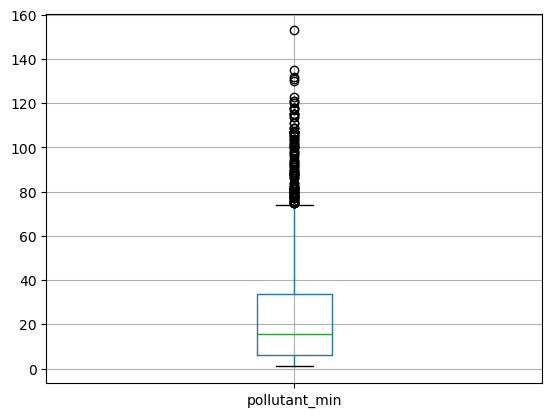

In [68]:
df_imputed.boxplot(column=["pollutant_min"])
plt.show()

In [70]:
Q1 = df_imputed["pollutant_min"].quantile(0.25)
Q3 = df_imputed["pollutant_min"].quantile(0.75)
IQR = Q3 - Q1

df_imputed["is_outlier"] = ~((df_imputed["pollutant_min"] >= Q1 - 1.5 * IQR) &
                          (df_imputed["pollutant_min"] <= Q3 + 1.5 * IQR))


to study the impacts of outliers later.

In [75]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3175 entries, 0 to 3174
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pollutant_min      3175 non-null   float64
 1   pollutant_max      3175 non-null   float64
 2   pollutant_avg      3175 non-null   float64
 3   state              3175 non-null   object 
 4   city               3175 non-null   object 
 5   station            3175 non-null   object 
 6   latitude           3175 non-null   float64
 7   longitude          3175 non-null   float64
 8   pollutant_missing  3175 non-null   int32  
 9   pollutant_id       3175 non-null   object 
 10  is_outlier         3175 non-null   bool   
dtypes: bool(1), float64(5), int32(1), object(4)
memory usage: 238.9+ KB


In [316]:
!pip install scipy

The Anderson-Darling test is used to assess whether a sample of data comes from a specific probability distribution, particularly a normal distribution

In [77]:
from scipy.stats import anderson
# column_test=df_imputed["pollutant_min"]
# print(column_test)
result=anderson(df_imputed["pollutant_min"])
print(result)


AndersonResult(statistic=148.8721070020224, critical_values=array([0.575, 0.655, 0.786, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=22.82617700254857, scale=22.708713653399183)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')


In [79]:
from scipy.stats import anderson
# column_test=df_imputed["pollutant_min"]
# print(column_test)
result=anderson(df_imputed["pollutant_max"])
print(result)

AndersonResult(statistic=135.033698471977, critical_values=array([0.575, 0.655, 0.786, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=72.3959464761698, scale=72.48731197612598)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')


In [81]:
from scipy.stats import anderson
# column_test=df_imputed["pollutant_min"]
# print(column_test)
result=anderson(df_imputed["pollutant_avg"])
print(result)

AndersonResult(statistic=128.50051097088908, critical_values=array([0.575, 0.655, 0.786, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=43.410178294952466, scale=41.789288100474536)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')


The Anderson-Darling test gives a number showing how much a data set deviates from the normal distribution shape.(doesnot follow normal distribution curve)


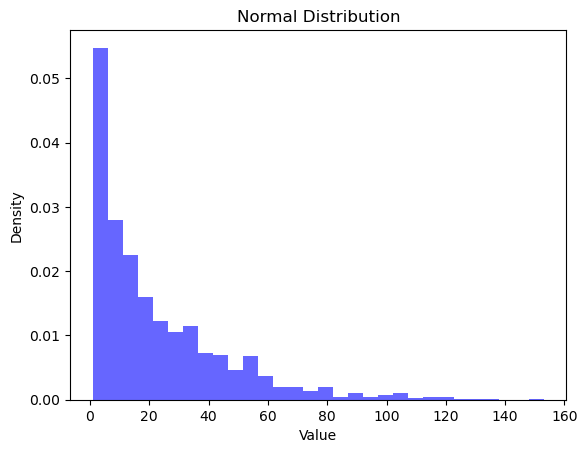

In [86]:
plt.title('Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()

In [84]:
plt.hist(df_imputed["pollutant_min"], bins=30, density=True, alpha=0.6, color='b')

(array([5.47658516e-02, 2.79734770e-02, 2.24409449e-02, 1.59759635e-02,
        1.22461666e-02, 1.05055947e-02, 1.15002072e-02, 7.33526730e-03,
        7.02445089e-03, 4.60008288e-03, 6.83796104e-03, 3.72979693e-03,
        1.98922503e-03, 2.05138831e-03, 1.30542893e-03, 1.92706175e-03,
        4.35142976e-04, 9.94612516e-04, 4.97306258e-04, 7.45959387e-04,
        9.94612516e-04, 3.10816411e-04, 4.35142976e-04, 3.72979693e-04,
        6.21632822e-05, 1.86489847e-04, 6.21632822e-05, 0.00000000e+00,
        0.00000000e+00, 6.21632822e-05]),
 array([  1.        ,   6.06666667,  11.13333333,  16.2       ,
         21.26666667,  26.33333333,  31.4       ,  36.46666667,
         41.53333333,  46.6       ,  51.66666667,  56.73333333,
         61.8       ,  66.86666667,  71.93333333,  77.        ,
         82.06666667,  87.13333333,  92.2       ,  97.26666667,
        102.33333333, 107.4       , 112.46666667, 117.53333333,
        122.6       , 127.66666667, 132.73333333, 137.8       ,
      

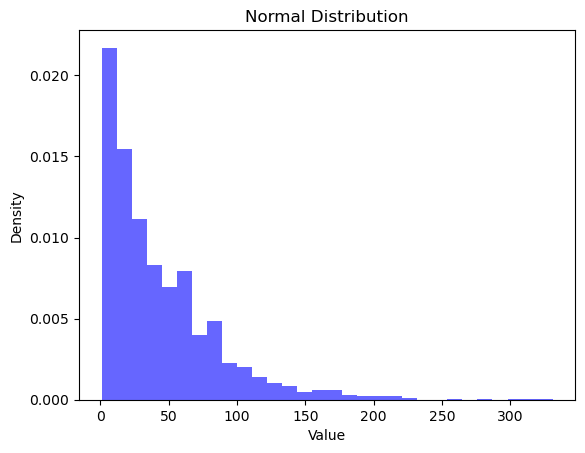

In [90]:
plt.hist(df_imputed["pollutant_avg"], bins=30, density=True, alpha=0.6, color='b')
plt.title('Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()

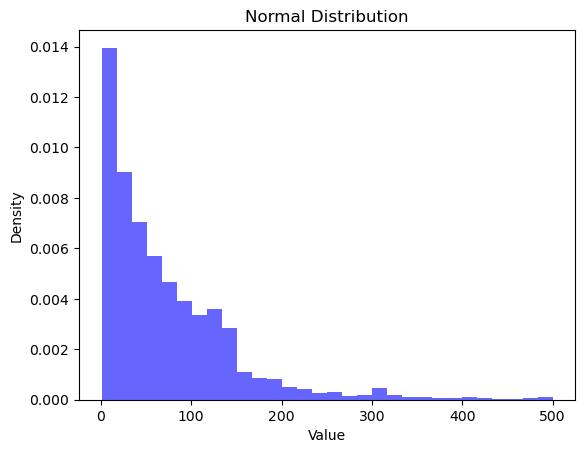

In [88]:
plt.hist(df_imputed["pollutant_max"], bins=30, density=True, alpha=0.6, color='b')
plt.title('Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()

Log transformation


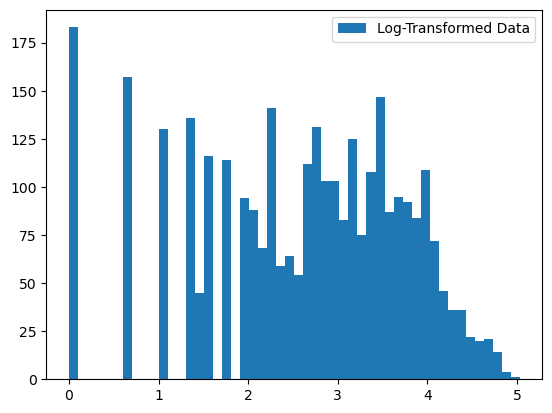

In [113]:
log_data = np.log(df_imputed["pollutant_min"])


plt.hist(log_data, bins=50, label='Log-Transformed Data')
plt.legend()
plt.show()

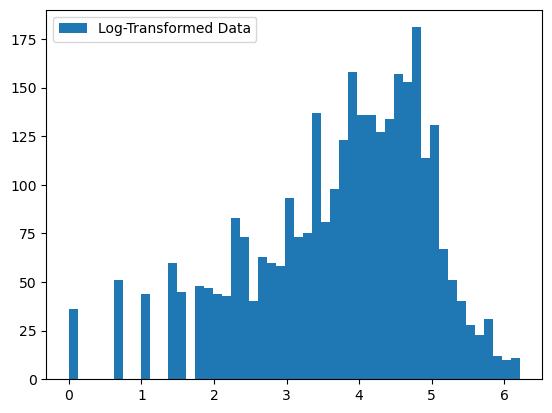

In [115]:
log_data = np.log(df_imputed["pollutant_max"])


plt.hist(log_data, bins=50, label='Log-Transformed Data')
plt.legend()
plt.show()

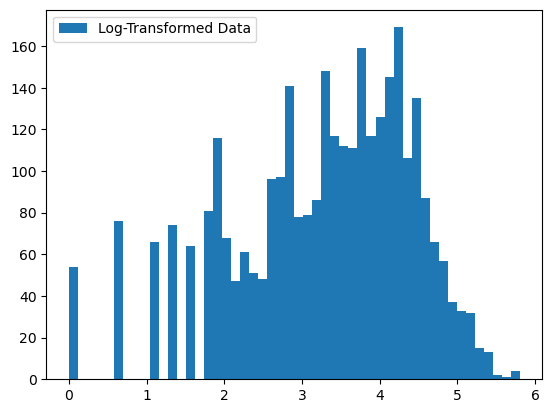

In [117]:
log_data = np.log(df_imputed["pollutant_avg"])


plt.hist(log_data, bins=50, label='Log-Transformed Data')
plt.legend()
plt.show()

It does reduce much of skewness so going with yeo johnson transformation.

In [122]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
df_imputed['pollutant_min_yeo'] = pt.fit_transform(df_imputed[['pollutant_min']])

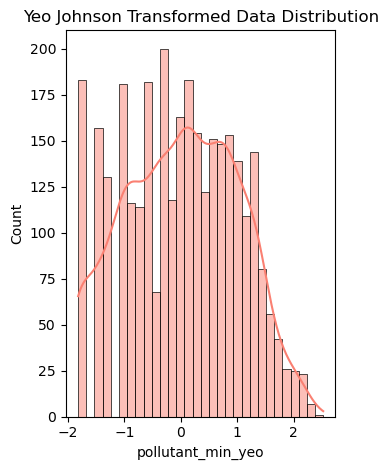

In [124]:
plt.subplot(1, 2, 2)
sns.histplot(df_imputed['pollutant_min_yeo'], kde=True, bins=30, color='salmon')
plt.title('Yeo Johnson Transformed Data Distribution')

plt.tight_layout()
plt.show()

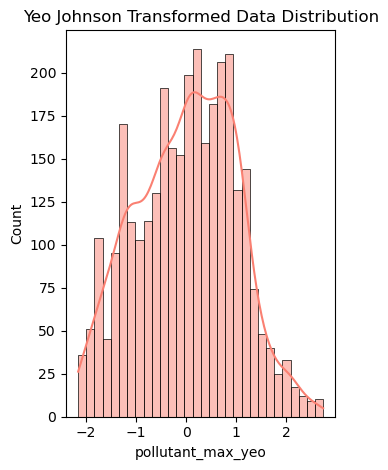

In [126]:
pt = PowerTransformer(method='yeo-johnson')
df_imputed['pollutant_max_yeo'] = pt.fit_transform(df_imputed[['pollutant_max']])
plt.subplot(1, 2, 2)
sns.histplot(df_imputed['pollutant_max_yeo'], kde=True, bins=30, color='salmon')
plt.title('Yeo Johnson Transformed Data Distribution')

plt.tight_layout()
plt.show()

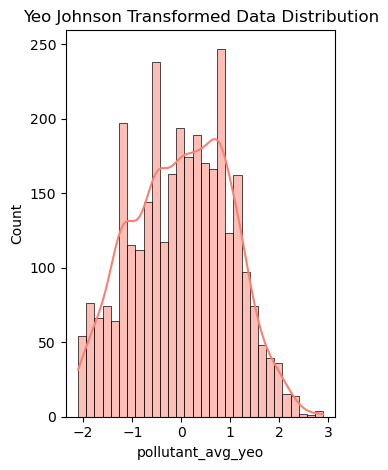

In [128]:
pt = PowerTransformer(method='yeo-johnson')
df_imputed['pollutant_avg_yeo'] = pt.fit_transform(df_imputed[['pollutant_avg']])
plt.subplot(1, 2, 2)
sns.histplot(df_imputed['pollutant_avg_yeo'], kde=True, bins=30, color='salmon')
plt.title('Yeo Johnson Transformed Data Distribution')

plt.tight_layout()
plt.show()

In [142]:
df_imputed["pollutant_avg_yeo"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 3175 entries, 0 to 3174
Series name: pollutant_avg_yeo
Non-Null Count  Dtype  
--------------  -----  
3175 non-null   float64
dtypes: float64(1)
memory usage: 24.9 KB


In [146]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3175 entries, 0 to 3174
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pollutant_min      3175 non-null   float64
 1   pollutant_max      3175 non-null   float64
 2   pollutant_avg      3175 non-null   float64
 3   state              3175 non-null   object 
 4   city               3175 non-null   object 
 5   station            3175 non-null   object 
 6   latitude           3175 non-null   float64
 7   longitude          3175 non-null   float64
 8   pollutant_missing  3175 non-null   int32  
 9   pollutant_id       3175 non-null   object 
 10  is_outlier         3175 non-null   bool   
 11  pollutant_min_yeo  3175 non-null   float64
 12  pollutant_max_yeo  3175 non-null   float64
 13  pollutant_avg_yeo  3175 non-null   float64
dtypes: bool(1), float64(8), int32(1), object(4)
memory usage: 313.3+ KB


In [170]:
one_hot=pd.get_dummies(df_imputed['state'])
datas=pd.concat([one_hot, df_imputed], axis=1)
datas=datas.drop('state',axis=1)

In [172]:
datas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3175 entries, 0 to 3174
Data columns (total 44 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Andaman and Nicobar  3175 non-null   bool   
 1   Andhra_Pradesh       3175 non-null   bool   
 2   Arunachal_Pradesh    3175 non-null   bool   
 3   Assam                3175 non-null   bool   
 4   Bihar                3175 non-null   bool   
 5   Chandigarh           3175 non-null   bool   
 6   Chhattisgarh         3175 non-null   bool   
 7   Delhi                3175 non-null   bool   
 8   Gujarat              3175 non-null   bool   
 9   Haryana              3175 non-null   bool   
 10  Himachal Pradesh     3175 non-null   bool   
 11  Jammu_and_Kashmir    3175 non-null   bool   
 12  Jharkhand            3175 non-null   bool   
 13  Karnataka            3175 non-null   bool   
 14  Kerala               3175 non-null   bool   
 15  Madhya Pradesh       3175 non-null   b

In [182]:
one_hot=pd.get_dummies(df_imputed['city'])
datas=pd.concat([one_hot, df_imputed], axis=1)
datas=datas.drop('city',axis=1)

In [186]:
datas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3175 entries, 0 to 3174
Columns: 263 entries, Agartala to pollutant_avg_yeo
dtypes: bool(251), float64(8), int32(1), object(3)
memory usage: 1.0+ MB


In [188]:
one_hot=pd.get_dummies(df_imputed['station'])
datas=pd.concat([one_hot, df_imputed], axis=1)
datas=datas.drop('station',axis=1)

In [190]:
datas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3175 entries, 0 to 3174
Columns: 491 entries, 32Bungalows, Bhilai - CECB to pollutant_avg_yeo
dtypes: bool(479), float64(8), int32(1), object(3)
memory usage: 1.7+ MB


In [196]:
one_hot=pd.get_dummies(df_imputed['pollutant_id'])
datas=pd.concat([one_hot, df_imputed], axis=1)
datas=datas.drop('pollutant_id',axis=1)

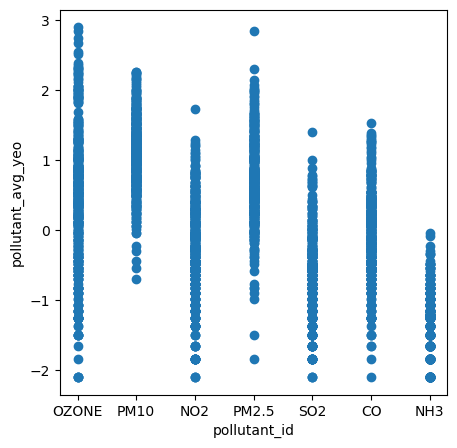

In [200]:
plt.figure(figsize=(5,5))
plt.scatter(df_imputed["pollutant_id"],df_imputed["pollutant_avg_yeo"])
plt.xlabel('pollutant_id')
plt.ylabel('pollutant_avg_yeo')
plt.show()


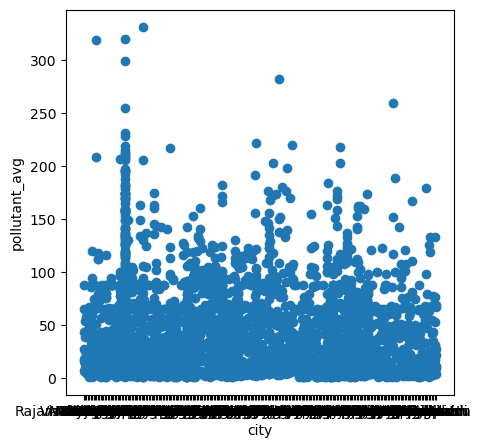

In [202]:
plt.figure(figsize=(5,5))
plt.scatter(x='city',y='pollutant_avg',data=df_imputed)
plt.xlabel('city')
plt.ylabel('pollutant_avg')
plt.show()


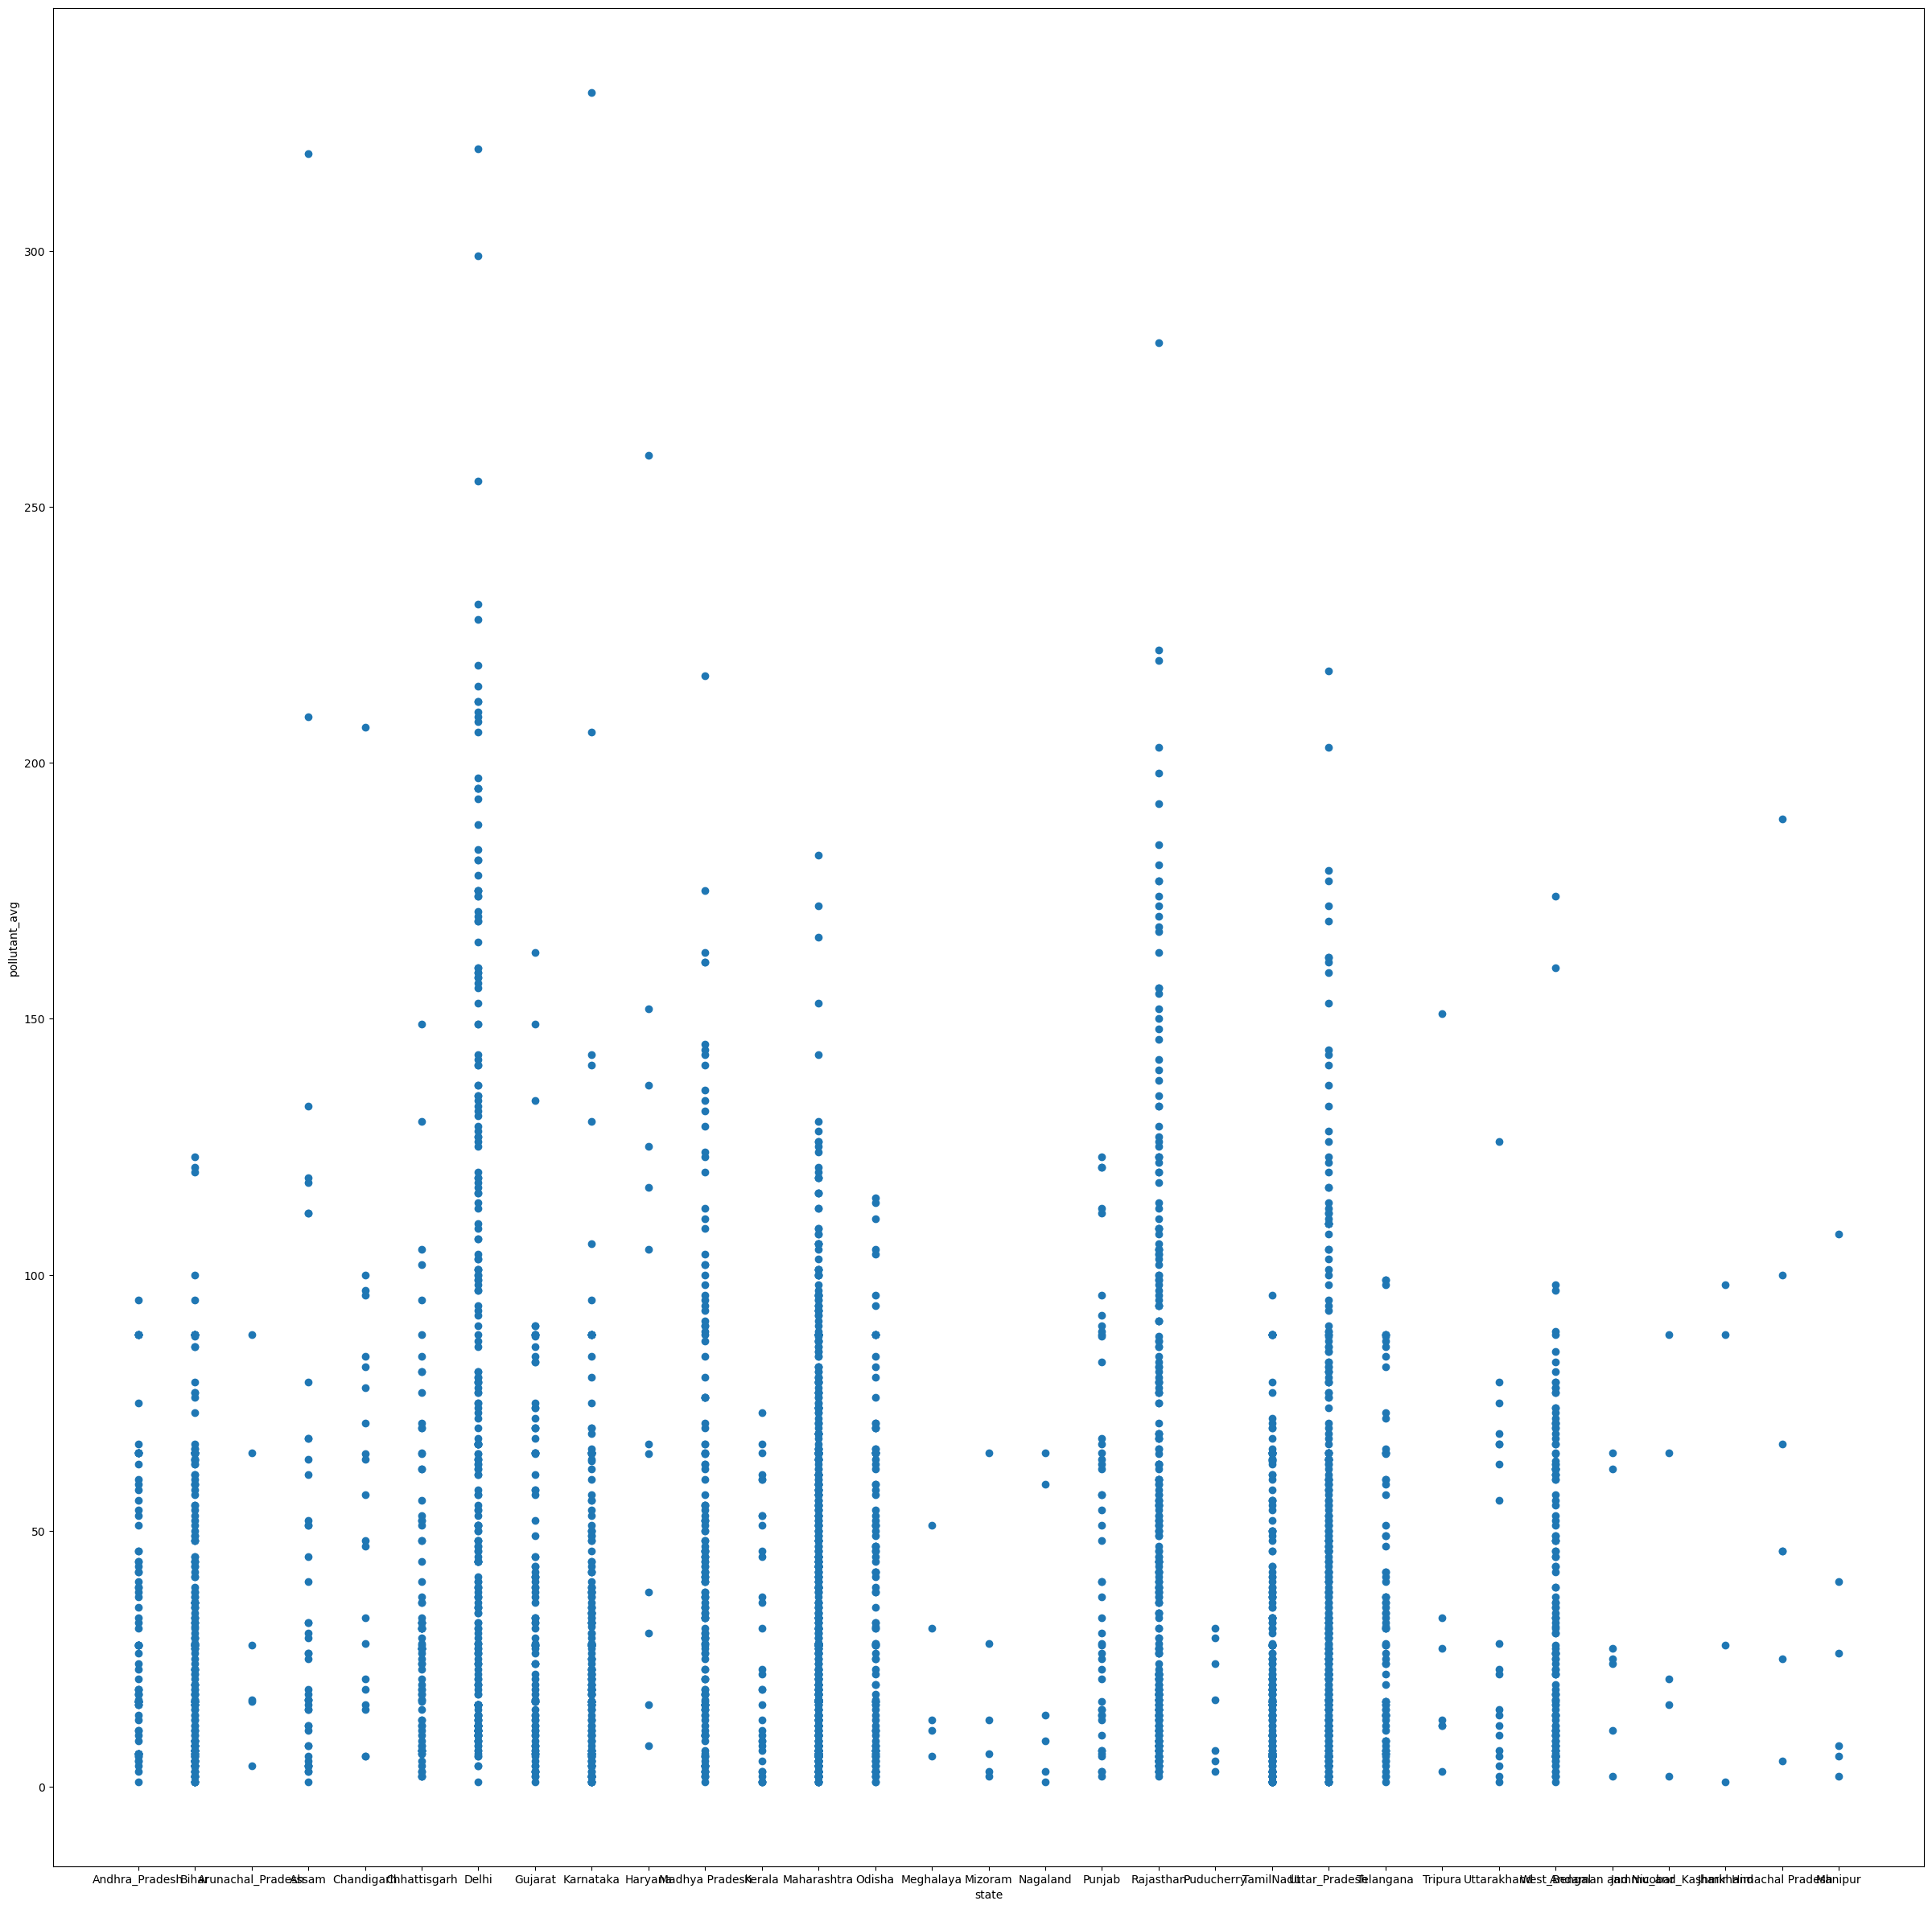

In [69]:
plt.figure(figsize=(30,30))
plt.scatter(x='state',y='pollutant_avg',data=df_imputed)
plt.xlabel('state')
plt.ylabel('pollutant_avg')
plt.show()


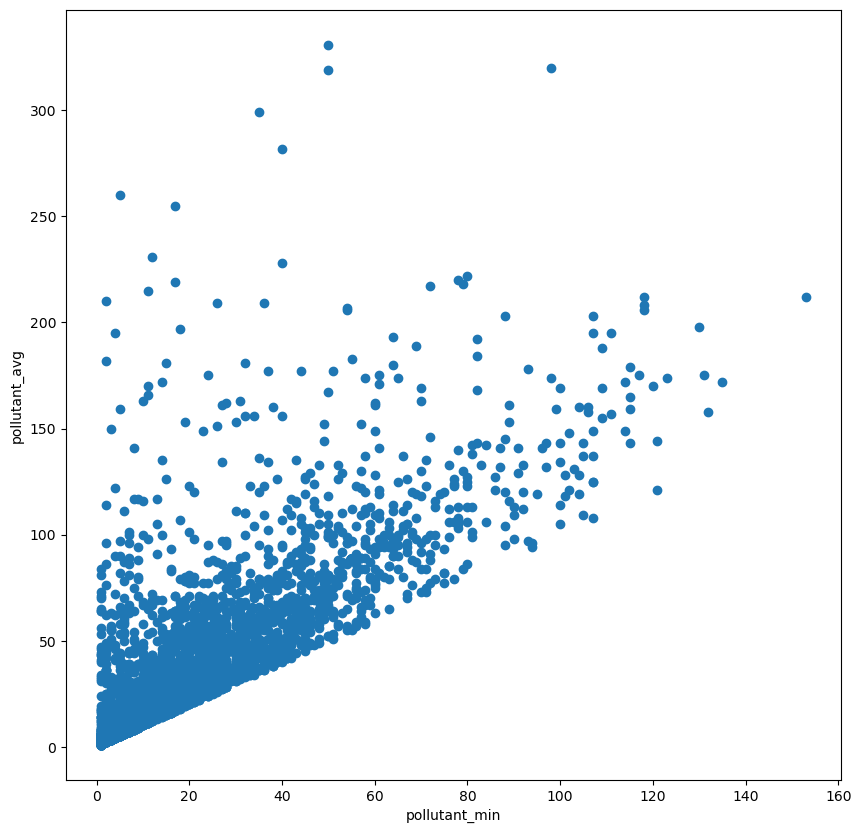

In [204]:
plt.figure(figsize=(10,10))
plt.scatter(x='pollutant_min',y='pollutant_avg',data=df_imputed)
plt.xlabel('pollutant_min')
plt.ylabel('pollutant_avg')
plt.show()

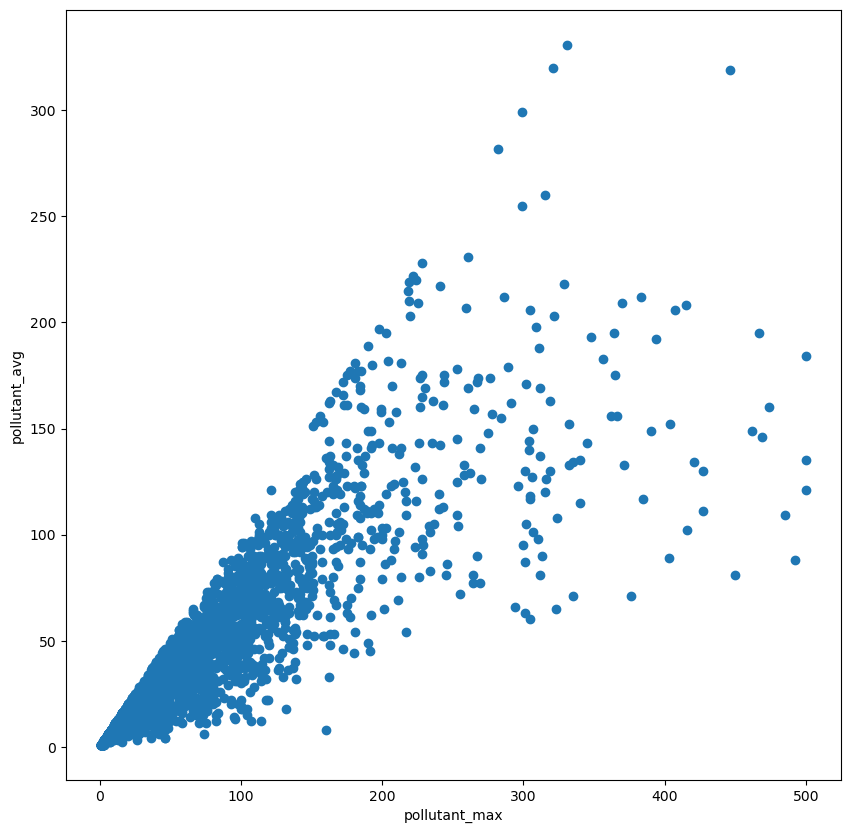

In [206]:
plt.figure(figsize=(10,10))
plt.scatter(x='pollutant_max',y='pollutant_avg',data=df_imputed)
plt.xlabel('pollutant_max')
plt.ylabel('pollutant_avg')
plt.show()

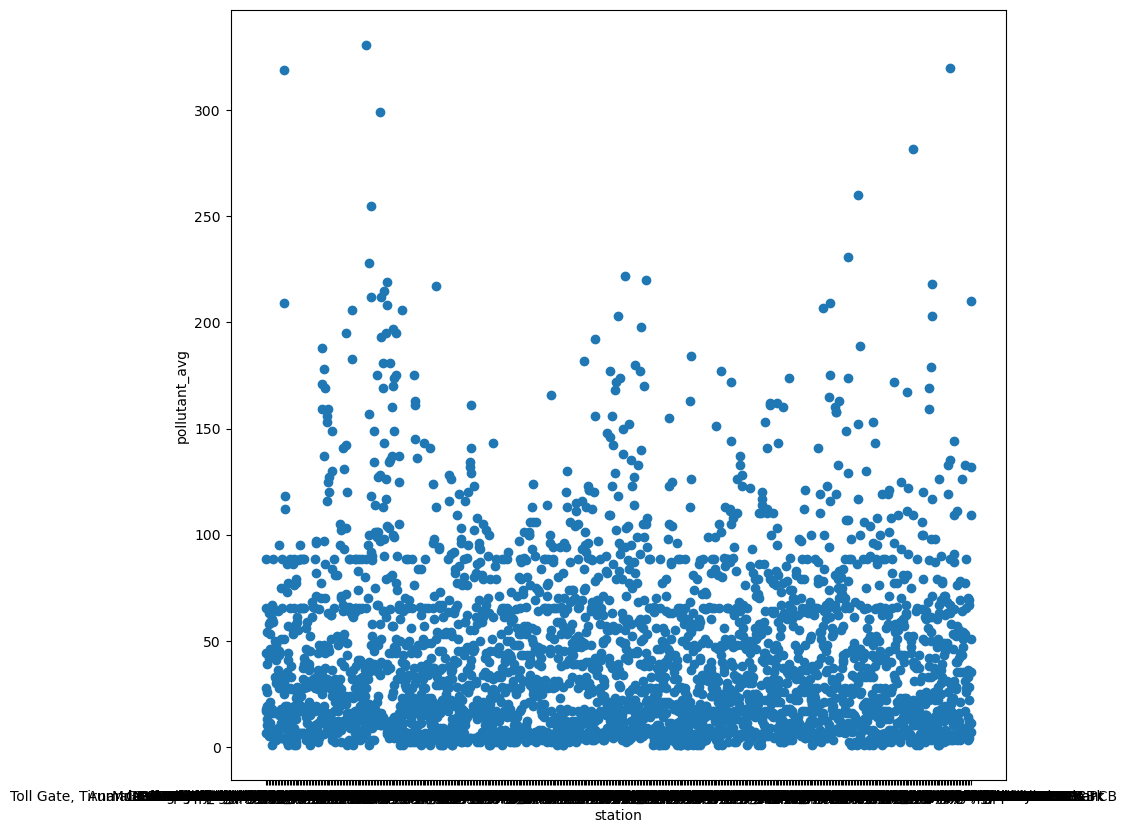

In [209]:
plt.figure(figsize=(10,10))
plt.scatter(x='station',y='pollutant_avg',data=df_imputed)
plt.xlabel('station')
plt.ylabel('pollutant_avg')
plt.show()

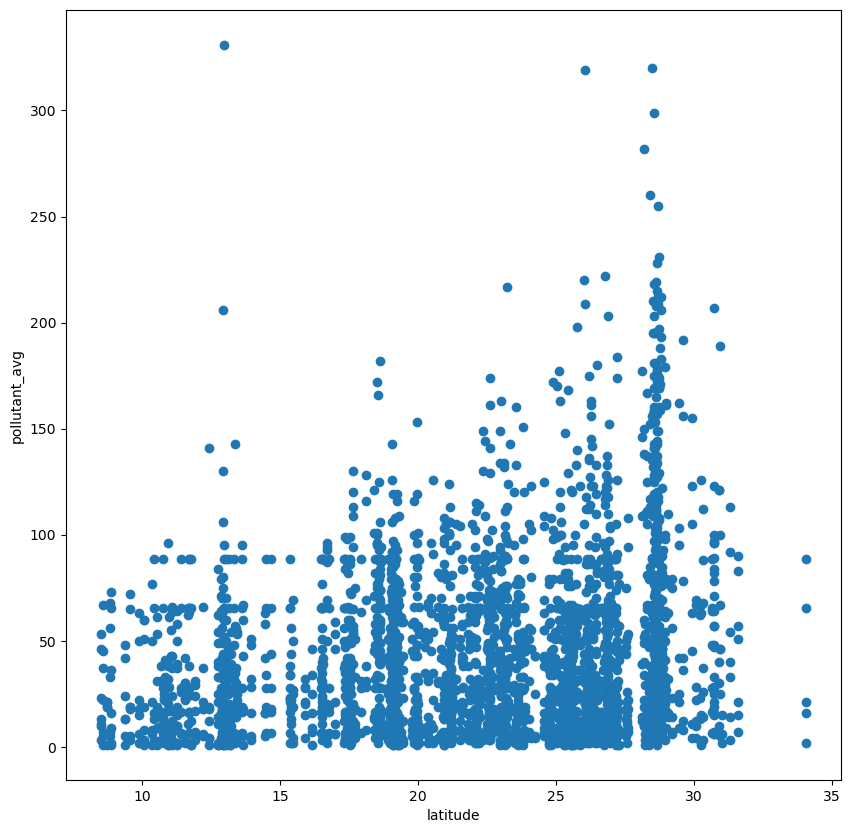

In [213]:
plt.figure(figsize=(10,10))
plt.scatter(x='latitude',y='pollutant_avg',data=df_imputed)
plt.xlabel('latitude')
plt.ylabel('pollutant_avg')
plt.show()

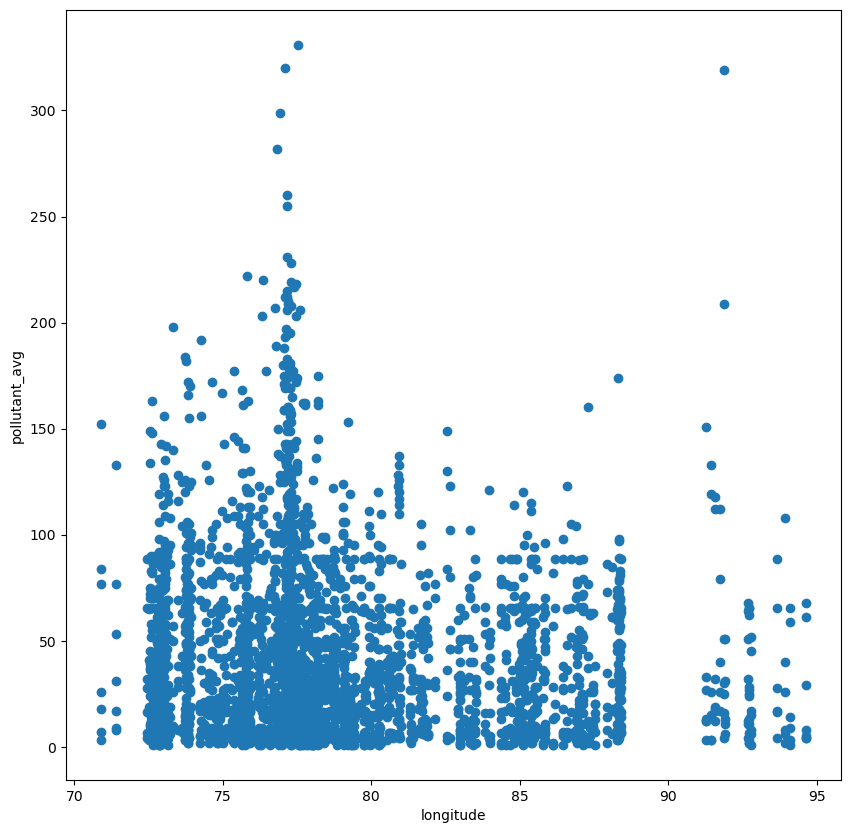

In [215]:
plt.figure(figsize=(10,10))
plt.scatter(x='longitude',y='pollutant_avg',data=df_imputed)
plt.xlabel('longitude')
plt.ylabel('pollutant_avg')
plt.show()